## Contents

1. A brief introduction to:
            
        ANN: Artificial neural network
        DNN: Deep neural network
        CNN: describing how the layers work and what Conv2D stands for, with introduction to pooling, flattening,activation functions
        
2. VGG



In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, ReLU, Activation, Flatten, Dropout, Conv2D, MaxPooling2D

import numpy as np
from PIL import Image
from IPython.display import Image

#### There are two types 
    Sequential API
    Functional API

Using Sequential API

In [4]:
# import sequential object (we have an empty model now)
model = Sequential()

# we are adding first layer (input) (10 nodes) with input shape 13 element vector (1D)
model.add(Dense(10,input_shape=(13,), activation ='relu')) 

# specify hidden layer
model.add(Dense(10, activation ='relu'))

#Add the third layerof 1 node (output)
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [5]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Sequential()
# we are adding first layer (input) (10 nodes) with input shape 13 element vector (1D)
model.add(Dense(10,input_shape=(13,), activation ='relu')) 
# specify hidden layer
model.add(Dense(10, activation ='relu'))
#Add the third layerof 1 node (output)
model.add(Dense(1, activation = 'sigmoid'))
# we added the sigmond here to pass the result from the final node through a sigmond function

# we are using the binary classifier so we are going to change the loss parameter here
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])


Multiclass classifier

Notes: We are going to use Adam optimizer here (it encorporates root mean square, adapative gradiant methods)

In [12]:
model = Sequential()
# we are adding first layer (input) (10 nodes) with input shape 4 element vector (1D)
# here its 4 because there are only 4 parameters in our dataset
model.add(Dense(10, input_shape=(4,), activation ='relu')) 

# specify hidden layer
model.add(Dense(10, activation ='relu'))

#Add the third layerof 5 nodes (output) because there are 5 classes/labels
model.add(Dense(1, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [ ]:
model = Sequential()
# we are adding first layer (input) (10 nodes) with input shape 4 element vector (1D)
# here its 3 because there are only 3 parameters in our dataset
model.add(Dense(10, input_shape=(3,), activation ='relu')) 
# specify hidden layer
model.add(Dense(10, activation ='relu'))

#Add the third layerof 7 node (output) (5 for age froup and 2 for gender)
model.add(Dense(7, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


Using functional API

In [ ]:

# creating the input vector
inputs=Input((13,))

# creating the first(input) layer
input = Dense(10)(inputs)
hidden = Dense(10)(input)
output = Dense(1)(hidden)

model = Model(inputs, output)

Binary classifier for "Functional API approach".


In [ ]:
inputs=Input((13,))

# creating the first(input) layer and tying the input vector
input = Dense(10)(inputs)
x = Dense(10)(input) #input layer
x = Activation('relu')(x)
x = Dense(10)(x) #hidden layer 
x = Activation('relu')(x)
x = Dense(1)(x) #output layer
outputs = Activation('sigmoid')(x)

model = Model(inputs, output)

Multi label Multicall Classifier

In [14]:
inputs=Input((3,))

# Creating the first(input) layer and tying the input vector
x = Dense(10, activation='relu')(inputs) # input layer
x = Dense(10, activation='relu')(x) #hidden layer 

# Creating two output layers and connecting them to the hidden layer
# They both are taking copy for the hidden layer, at this step we are branching it.
output1 = Dense(5,activation='softmax')(x) #output layer for "age group"
output2 = Dense(2,activation='softmax')(x) # output layer for "gender"

model = Model(inputs, [output1, output2])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

### Flattenign of layer and Regularization (using dropout) to avoid overfititng

We add a layer at the beginning of our neural network to flatten the input,using class flatten. here we are workign towards MNIST dataset

In [17]:
model = Sequential()
#taking the put as 28*28 matrix and flattening it to 784 vector
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.5))

#Add the third layerof 10 node (output) as the output can be any of 7 digits
model.add(Dense(10, activation = 'softmax'))
# the result from the final node through a softmax function

# we are using the binary classifier so we are going to change the loss parameter here
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [18]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### CNN basic Sequential API Model

Convolution layer (you mention the filter size and stride) ->  Rectified linear unit (ReLU()) -> MaxPool2D(reducing the size of feature map) -> flattening(to convert it to 1D vector) -> input to the DNN -> 

Step1: Convolutional layer of 16 filters as the first layer using the Conv2D class object. Number of filters means number of feature maps that will be created.

Note:

    1. Number of feature maps = number of filters
    2. Stride 1 means the size of the feature map is same as the size of input image
    3. Stride 2 means the size of the feaure map is reduced 

In [7]:

model = Sequential()

# Create a convolutional layer with 16 3x3 filters and stride of two as the input layer
# size of each filter will be a 3x3, which is specified by the parameter kernel_size
# stride (2,2), the first digit is for horizontal stride and the second is for vertical stride

# grey scale image is(128,128,1)
# if its RGB then its (128,128,3)
model.add(Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding="same", input_shape=(128,128,1)))

# next step is to pass the output(features map) from the input layer through a rectified linear unit activation funciton 
model.add(ReLU())

# next step is to downsample the feature map into smaller pooled feature map
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# adding the flattenign layer to the flatten the pooled feature maps to a 1D input vector for the DNN classifier 
model.add(Flatten())

# Add the input layer for the DNN backend
model.add(Dense(512))
model.add(ReLU())

# adding the output layer, 26 nodes for clssifying (26 depends on how many classes you wanna classify)
model.add(Dense(26))
model.add(Activation('softmax'))

# Categorical class entropy loss function for multiclass classifier
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               8389120   
_________________________________________________________________
re_lu_3 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 26)               

(None, 64, 64, 16) -> The first value in this is the Batchsize which is "None" here, it will be bound when the model is being fed forward. 64 X 64 is the output size of the feature maps, 16 is total number of filters. 


### CNN Functional API

In [5]:
inputs = Input(shape=(128, 128, 1))
layer = Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding="same", activation='relu')(inputs)
layer = MaxPooling2D(pool_size=(2,2), strides=(2,2))(layer)
layer = Flatten()(layer)
layer = Dense(512, activation='relu')(layer)
outputs = Dense(26,activation='softmax')(layer)

model = Model(inputs,outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dense_3 (Dense)              (None, 26)                13338     
Total params: 8,402,618
Trainable params: 8,402,618
Non-trainable params: 0
___________________________________________________

# VGG net

This can be done in two ways: 
        
        Sequential flow
        reusing functions for duplicating the common blocks of layers
        
#### Application:

    Given image → find object name in the image
    It can detect any one of 1000 images
    It takes input image of size 224 * 224 * 3 (RGB image)

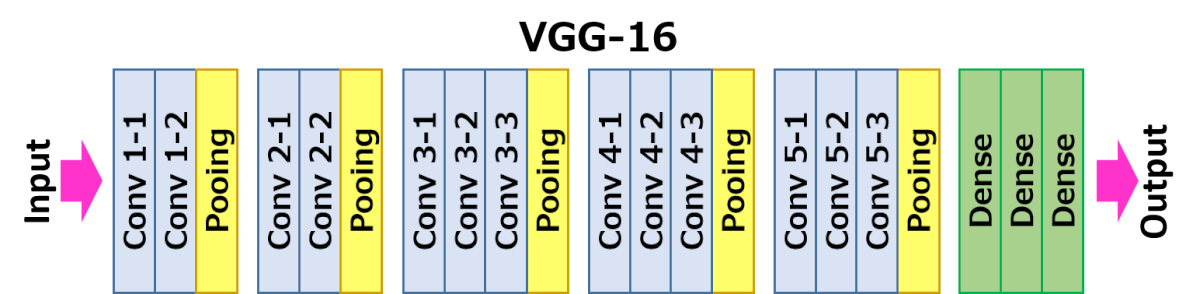

In [2]:
Image(filename='vgg16.png')

In [4]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


i=128
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

i=256
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

i=256*2
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# final convolution block
i=256*2
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(Conv2D(i, (3, 3), strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# DNN backend
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

# output layer for classification(1000)
model.add(Dense(1000, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 256)      

### VGG 16 Using loops

In [11]:
def conv_block(n_layers,n_filters):
    
    for n in range(n_layers):
        model.add(Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same", activation='relu'))
    
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(MaxPooling2D(2, strides=2))

# convolution frontend
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=(224,224,3)))

conv_block(1,64)
conv_block(2,128)
conv_block(3,256)
conv_block(3,512)
conv_block(3,512)

# rest is same
# DNN backend
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

# output layer for classification(1000)
model.add(Dense(1000, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])



# ResNet network

In [ ]:
def residual_block(n_filters, x):
    """ Create a Residual Block of Convolutions
        n_filters: number of filters
        x        : input into the block
    """
    shortcut = x
    x = layers.Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",  activation="relu")(x)
    x = layers.Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",  activation="relu")(x)
    x = layers.Add([shortcut, x])
    return x

def conv_block(n_filters, x):
    """ Create Block of Convolutions without Pooling
        n_filters: number of filters
        x        : input into the block
    """
    x = layers.Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same", activation="relu")(x)
    x = layers.Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same", activation="relu")(x)
    return x


In [ ]:
model.summary()